In [78]:
car_data = "https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data"

In [79]:
import pandas as pd
pd.read_csv(car_data, header=None)

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [80]:
columns =["Buying",
"Maintaince",
"Doors",
"Persons",
"Lug_boot",
"Safety","Class_value"]

In [81]:
df = pd.read_csv(car_data, names=columns)

In [82]:
df.dtypes

Buying         object
Maintaince     object
Doors          object
Persons        object
Lug_boot       object
Safety         object
Class_value    object
dtype: object

In [83]:
df

,Buying,Maintaince,Doors,Persons,Lug_boot,Safety,Class_value
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [84]:
df.shape

(1728, 7)

In [85]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Buying       1728 non-null   object
 1   Maintaince   1728 non-null   object
 2   Doors        1728 non-null   object
 3   Persons      1728 non-null   object
 4   Lug_boot     1728 non-null   object
 5   Safety       1728 non-null   object
 6   Class_value  1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


Buying         0
Maintaince     0
Doors          0
Persons        0
Lug_boot       0
Safety         0
Class_value    0
dtype: int64

In [86]:
X, y = df.iloc[:, :-1], df.iloc[:, -1]

In [87]:
X

,Buying,Maintaince,Doors,Persons,Lug_boot,Safety
0,vhigh,vhigh,2,2,small,low
1,vhigh,vhigh,2,2,small,med
2,vhigh,vhigh,2,2,small,high
3,vhigh,vhigh,2,2,med,low
4,vhigh,vhigh,2,2,med,med
...,...,...,...,...,...,...
1723,low,low,5more,more,med,med
1724,low,low,5more,more,med,high
1725,low,low,5more,more,big,low
1726,low,low,5more,more,big,med


In [88]:
y

0       unacc
1       unacc
2       unacc
3       unacc
4       unacc
        ...  
1723     good
1724    vgood
1725    unacc
1726     good
1727    vgood
Name: Class_value, Length: 1728, dtype: object

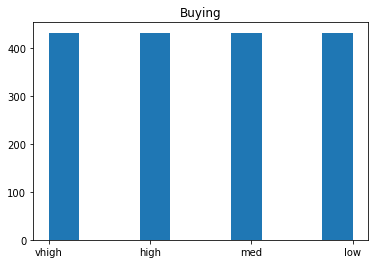

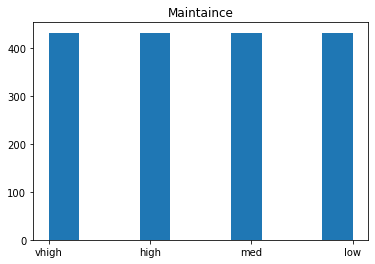

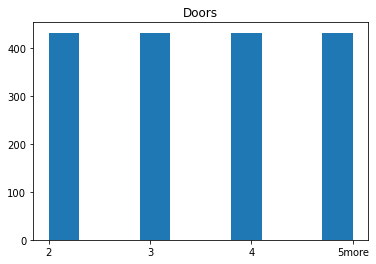

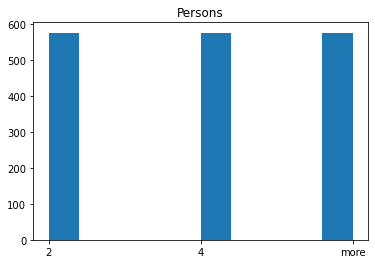

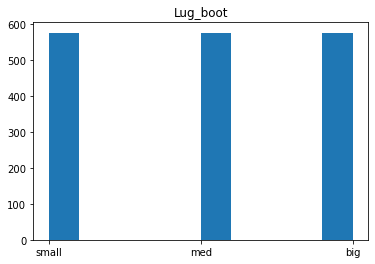

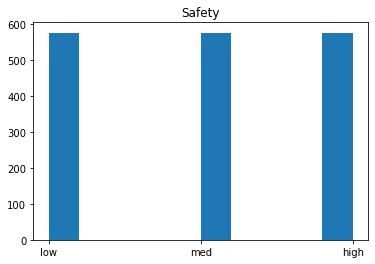

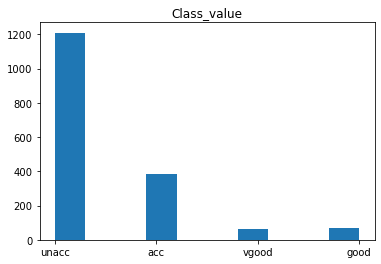

In [89]:
import matplotlib.pyplot as plt
for col_name in df.columns:
        plt.figure()
        plt.hist(df[col_name])
        plt.title(col_name)

In [90]:
for col_name in df.columns:
    print(df[col_name].value_counts())  

vhigh    432
high     432
low      432
med      432
Name: Buying, dtype: int64
vhigh    432
high     432
low      432
med      432
Name: Maintaince, dtype: int64
2        432
3        432
5more    432
4        432
Name: Doors, dtype: int64
2       576
4       576
more    576
Name: Persons, dtype: int64
small    576
big      576
med      576
Name: Lug_boot, dtype: int64
high    576
low     576
med     576
Name: Safety, dtype: int64
unacc    1210
acc       384
good       69
vgood      65
Name: Class_value, dtype: int64


In [91]:
df['Class_value'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: Class_value, dtype: int64

In [92]:
from sklearn.tree import DecisionTreeClassifier


In [98]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3,stratify=y)

In [99]:
X_train.shape, X_test.shape

((1209, 6), (519, 6))

In [101]:
from sklearn.preprocessing import OrdinalEncoder
le = OrdinalEncoder()
X_train = le.fit_transform(X_train)
X_test = le.transform(X_test)

In [104]:
X_test

array([[1., 3., 1., 2., 0., 0.],
       [2., 2., 2., 0., 0., 0.],
       [2., 1., 0., 2., 0., 0.],
       ...,
       [2., 1., 1., 1., 2., 0.],
       [3., 2., 3., 1., 1., 2.],
       [0., 3., 0., 2., 0., 0.]])

In [166]:
dt_clf = DecisionTreeClassifier(criterion='gini',random_state=42,max_depth=12)
dt_clf = dt_clf.fit(X_train, y_train)

[Text(3185.8783783783783, 2613.4615384615386, 'Persons <= 0.5\ngini = 0.457\nsamples = 1209\nvalue = [269, 48, 847, 45]\nclass = Doors'),
 Text(3110.472972972973, 2404.3846153846152, 'gini = 0.0\nsamples = 404\nvalue = [0, 0, 404, 0]\nclass = Doors'),
 Text(3261.2837837837837, 2404.3846153846152, 'Safety <= 0.5\ngini = 0.579\nsamples = 805\nvalue = [269, 48, 443, 45]\nclass = Doors'),
 Text(1865.1055743243244, 2195.3076923076924, 'Maintaince <= 2.5\ngini = 0.634\nsamples = 271\nvalue = [144, 22, 60, 45]\nclass = Buying'),
 Text(1015.6165540540541, 1986.2307692307693, 'Buying <= 0.5\ngini = 0.625\nsamples = 215\nvalue = [118, 22, 30, 45]\nclass = Buying'),
 Text(226.2162162162162, 1777.1538461538462, 'Doors <= 0.5\ngini = 0.101\nsamples = 56\nvalue = [53, 0, 3, 0]\nclass = Buying'),
 Text(150.8108108108108, 1568.076923076923, 'Lug_boot <= 1.5\ngini = 0.278\nsamples = 18\nvalue = [15, 0, 3, 0]\nclass = Buying'),
 Text(75.4054054054054, 1359.0, 'gini = 0.0\nsamples = 12\nvalue = [12, 0, 0

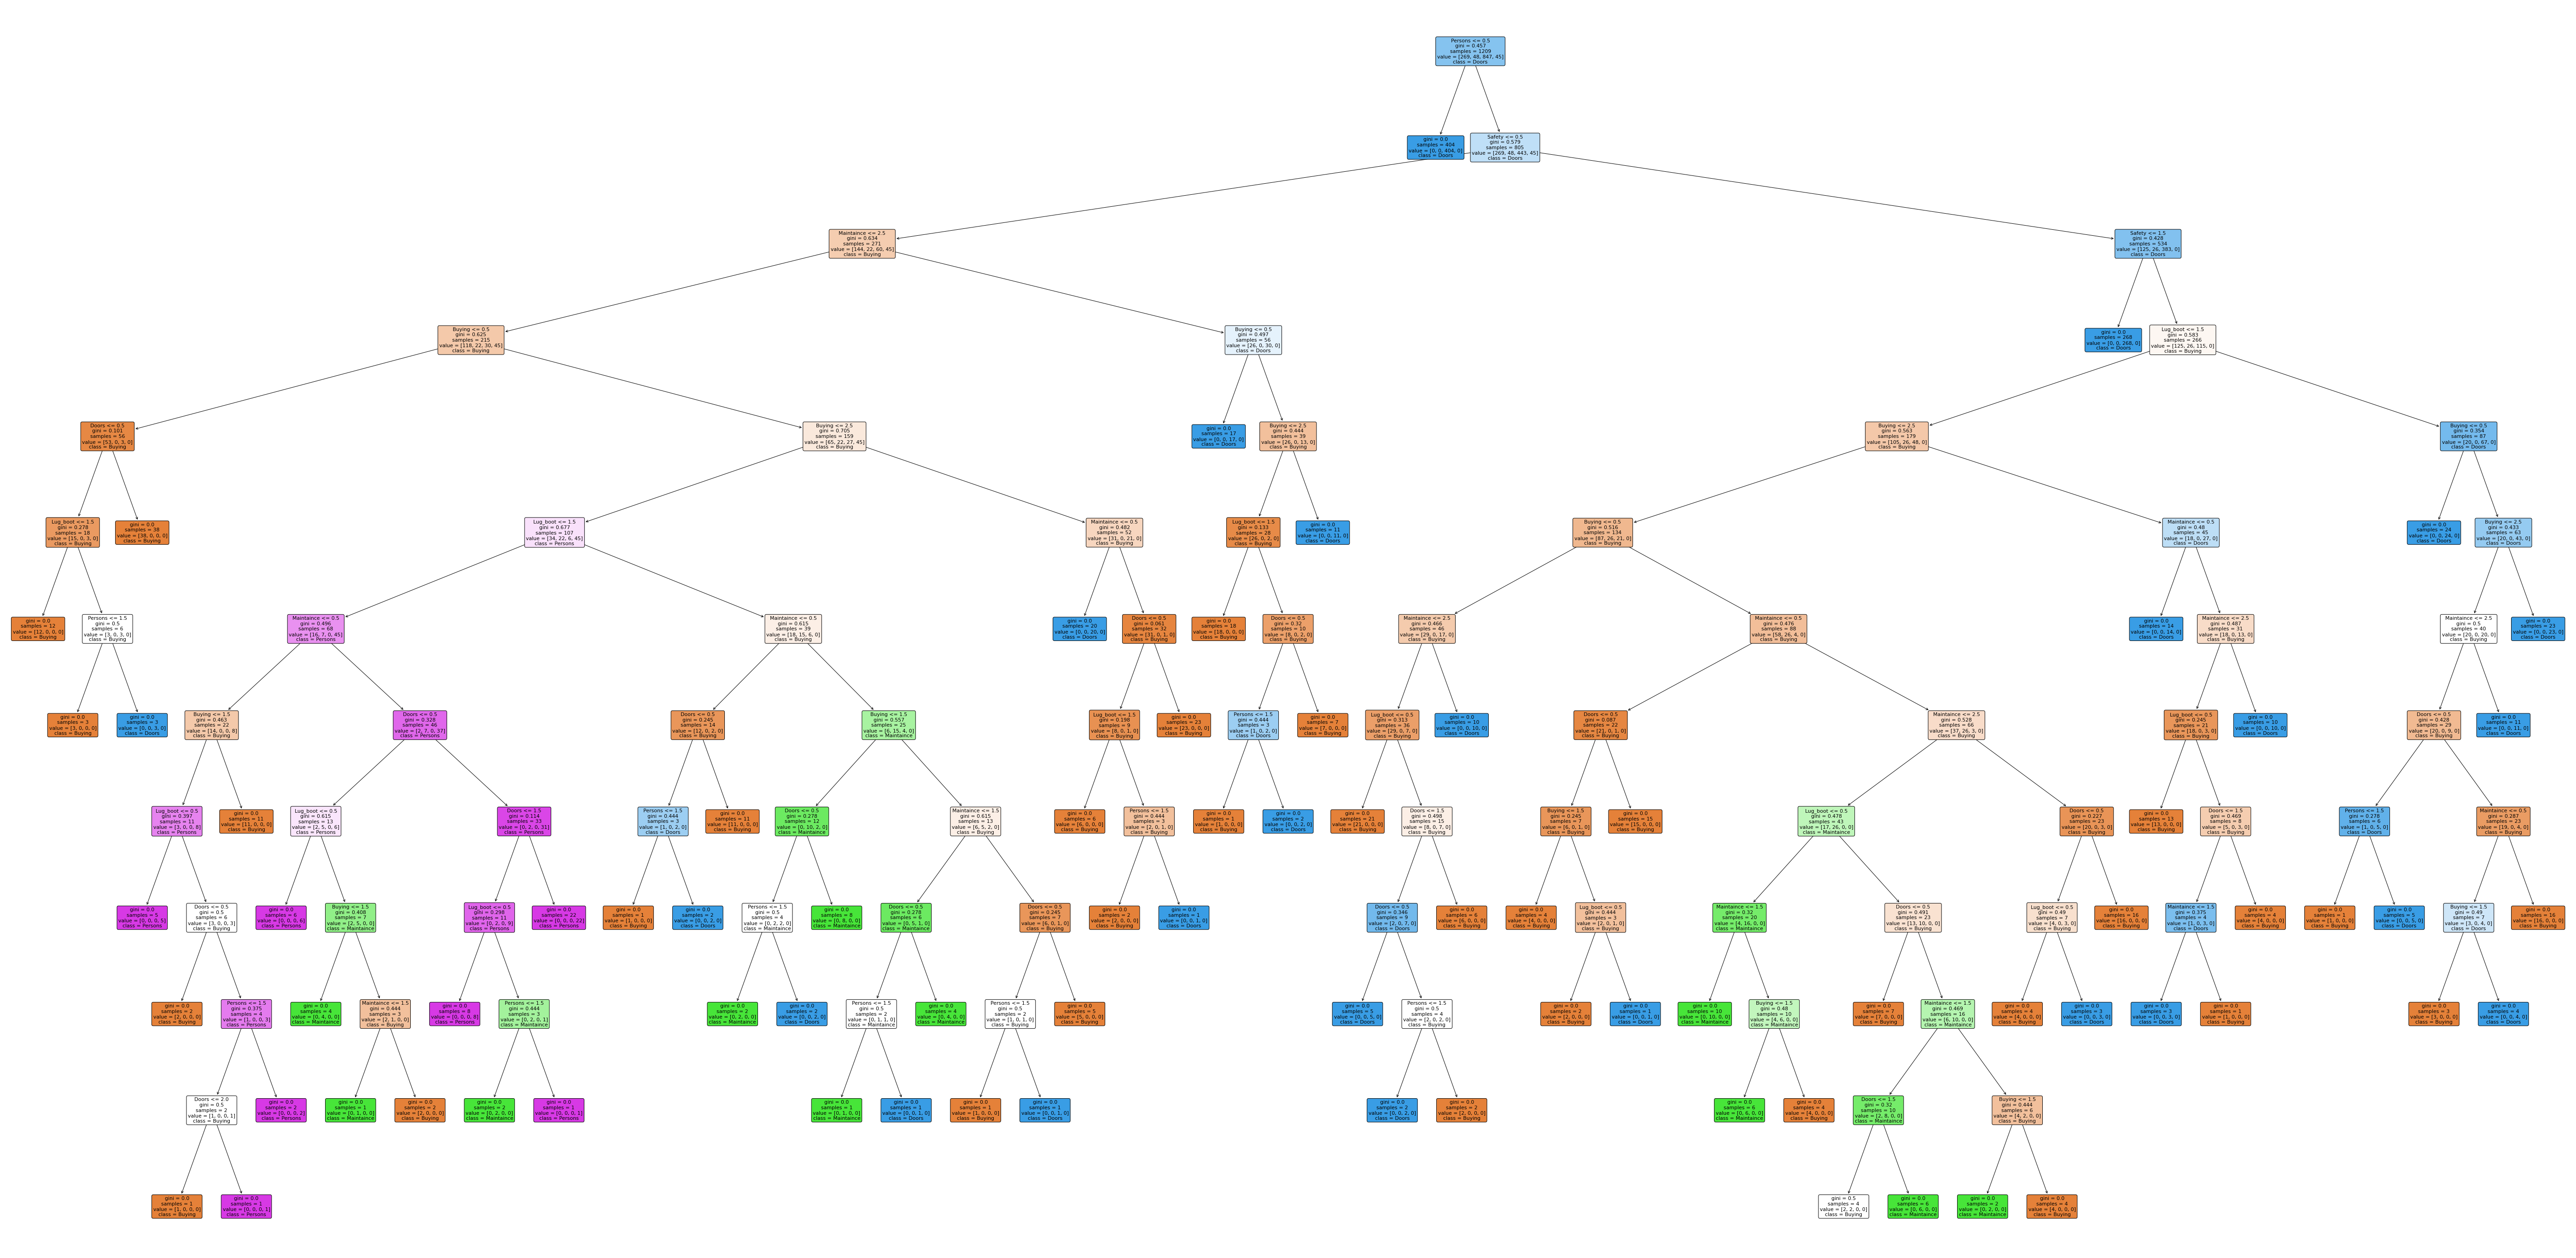

In [167]:
from sklearn.tree import plot_tree
plt.figure(figsize=(100, 50))
plot_tree(dt_clf,
          filled=True,
          rounded=True,
          class_names=["Buying",
"Maintaince",
"Doors",
"Persons",
"Lug_boot",
"Safety"],
         feature_names=X.columns)

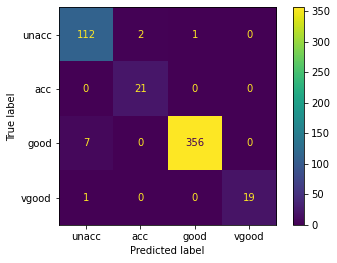

In [168]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(dt_clf, X_test, y_test, display_labels=["unacc","acc","good","vgood"])

In [169]:
predictions = dt_clf.predict(X_test)

In [170]:
accuracy = (predictions==y_test).sum()/(len(y_test))
accuracy

0.9788053949903661

In [171]:
accuracy = accuracy*100
accuracy

97.88053949903662

In [173]:
print('Training set score: {:.4f}'.format(dt_clf.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(dt_clf.score(X_test, y_test)))

Training set score: 0.9983
Test set score: 0.9788


In [185]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}%'. format(accuracy_score(y_test,predictions)*100))

Model accuracy score with criterion gini index: 97.4952%


In [176]:
dt_clf1 = DecisionTreeClassifier(criterion='entropy',random_state=42,max_depth=12)
dt_clf1 = dt_clf.fit(X_train, y_train)

[Text(3029.08447265625, 2613.4615384615386, 'Persons <= 0.5\nentropy = 1.204\nsamples = 1209\nvalue = [269, 48, 847, 45]\nclass = Doors'),
 Text(2941.89697265625, 2404.3846153846152, 'entropy = 0.0\nsamples = 404\nvalue = [0, 0, 404, 0]\nclass = Doors'),
 Text(3116.27197265625, 2404.3846153846152, 'Safety <= 0.5\nentropy = 1.478\nsamples = 805\nvalue = [269, 48, 443, 45]\nclass = Doors'),
 Text(1662.01171875, 2195.3076923076924, 'Buying <= 2.5\nentropy = 1.691\nsamples = 271\nvalue = [144, 22, 60, 45]\nclass = Buying'),
 Text(882.7734375, 1986.2307692307693, 'Buying <= 0.5\nentropy = 1.688\nsamples = 208\nvalue = [113, 22, 28, 45]\nclass = Buying'),
 Text(348.75, 1777.1538461538462, 'Maintaince <= 2.5\nentropy = 0.847\nsamples = 73\nvalue = [53, 0, 20, 0]\nclass = Buying'),
 Text(261.5625, 1568.076923076923, 'Doors <= 0.5\nentropy = 0.301\nsamples = 56\nvalue = [53, 0, 3, 0]\nclass = Buying'),
 Text(174.375, 1359.0, 'Lug_boot <= 1.5\nentropy = 0.65\nsamples = 18\nvalue = [15, 0, 3, 0]\

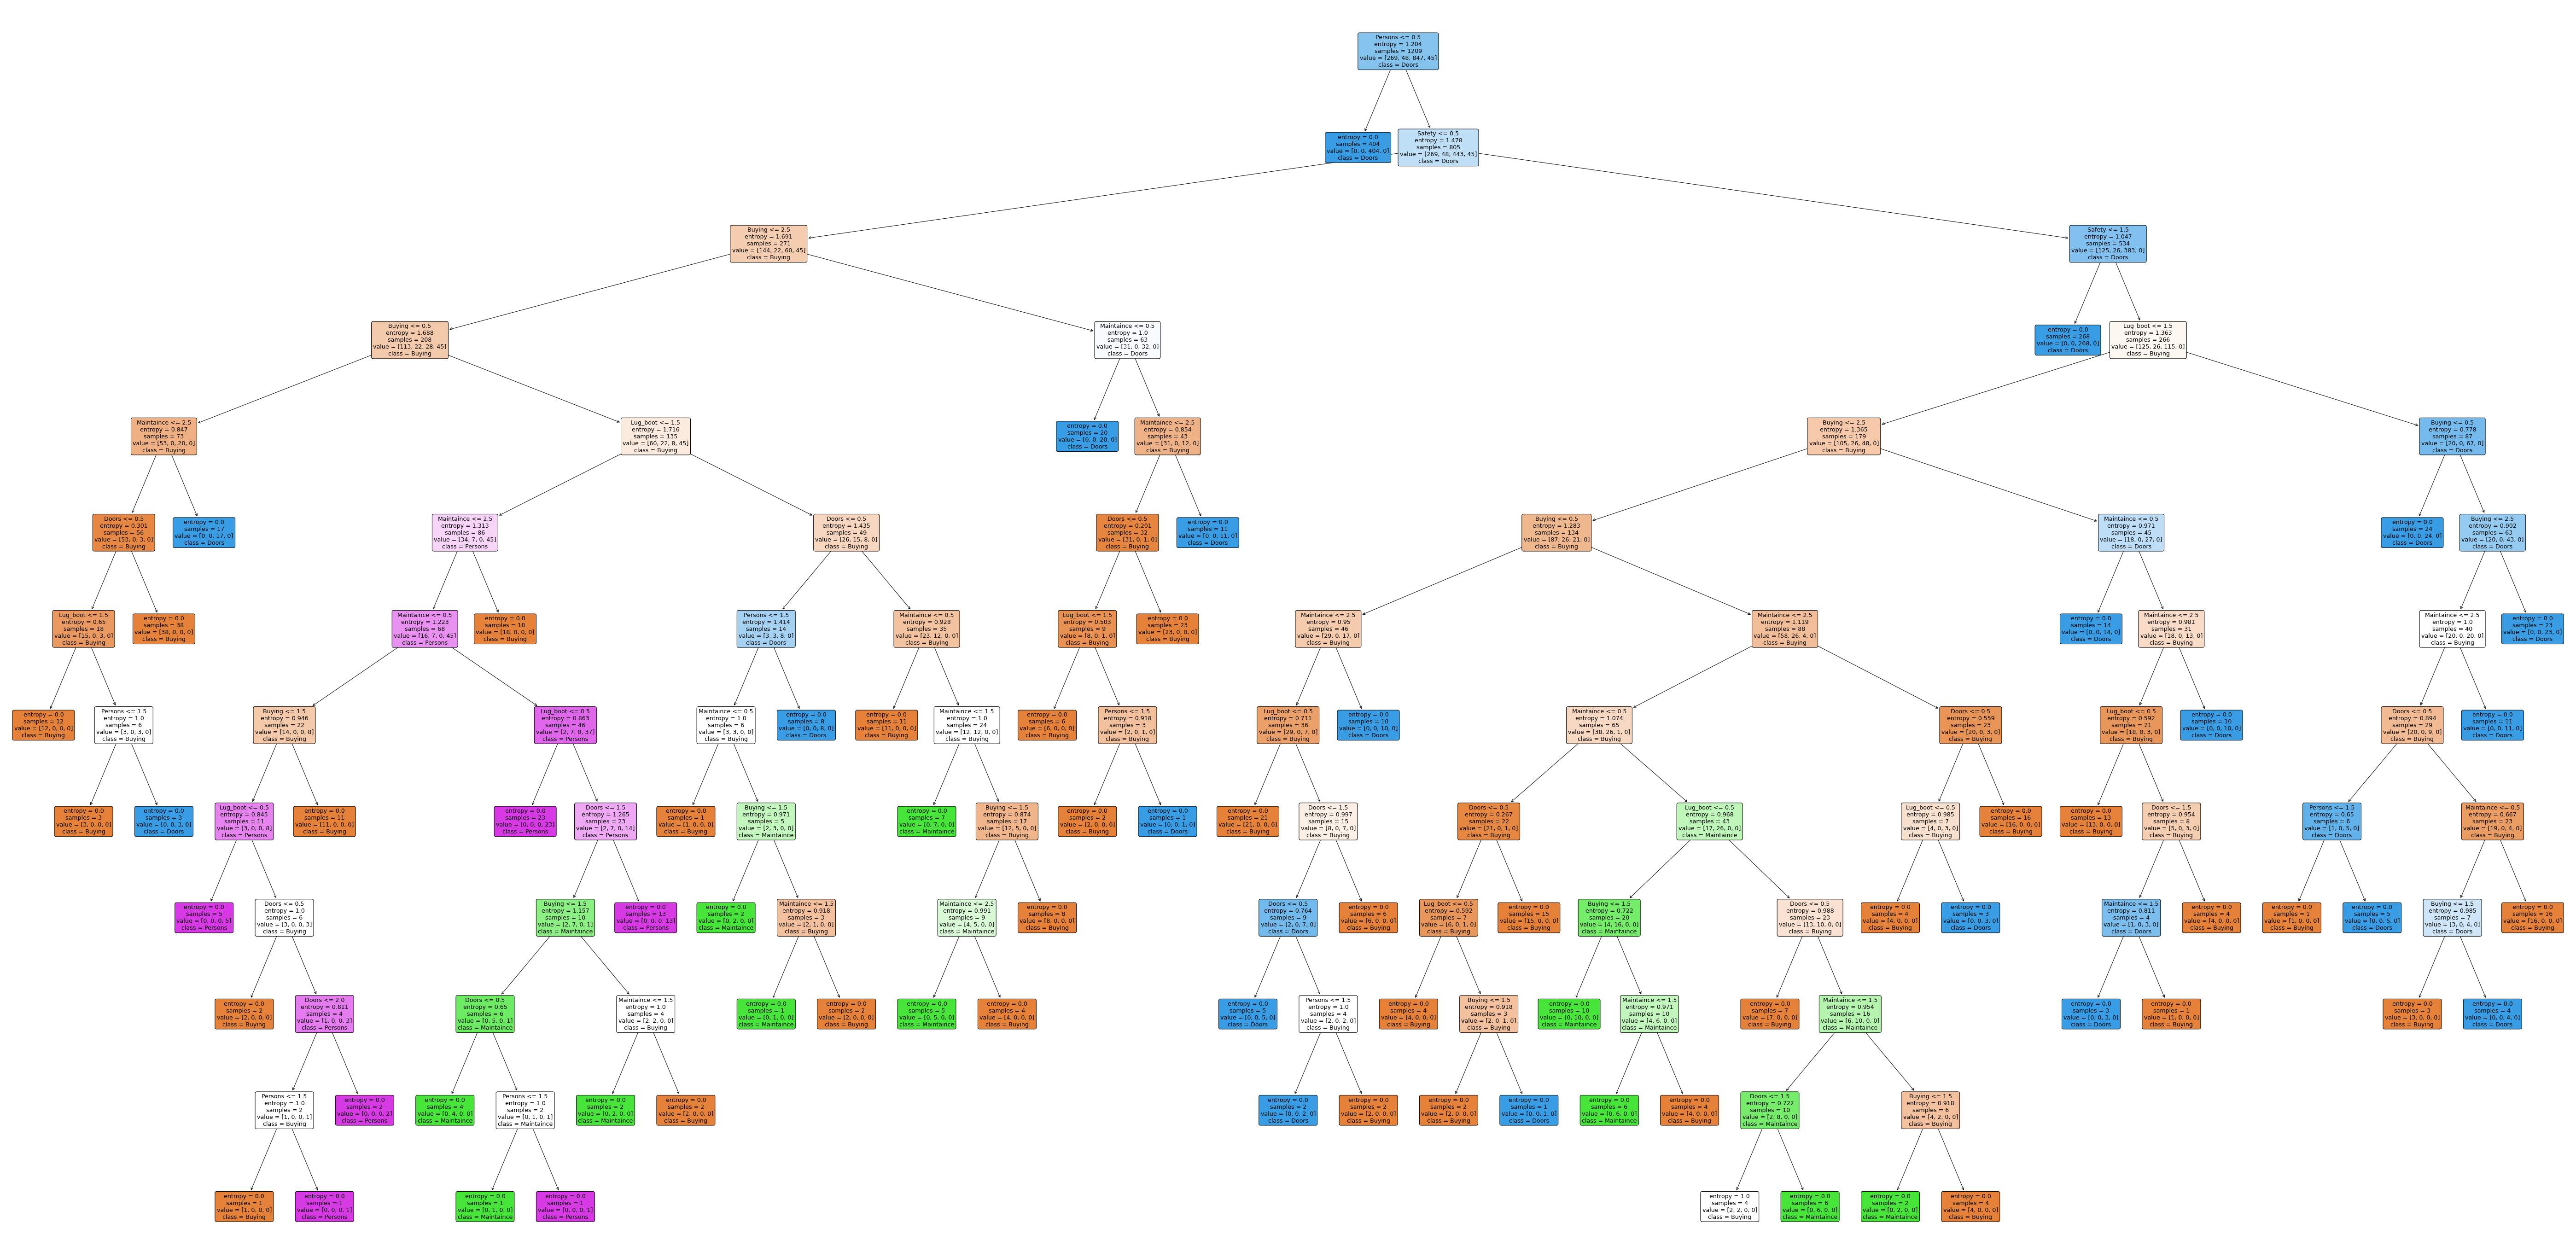

In [177]:

plt.figure(figsize=(100, 50))
plot_tree(dt_clf1,
          filled=True,
          rounded=True,
          class_names=["Buying",
"Maintaince",
"Doors",
"Persons",
"Lug_boot",
"Safety"],
         feature_names=X.columns)

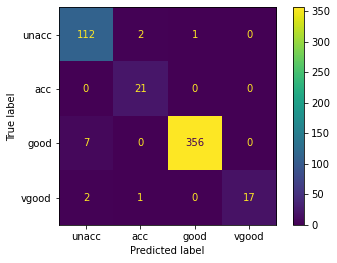

In [178]:
plot_confusion_matrix(dt_clf1, X_test, y_test, display_labels=["unacc","acc","good","vgood"])

In [187]:
prediction = dt_clf1.predict(X_test)

In [192]:
accuracys = (prediction==y_test).sum()/(len(y_test))
accuracys

0.9749518304431599

In [189]:
print('Training set score: {:.4f}'.format(dt_clf1.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(dt_clf1.score(X_test, y_test)))

Training set score: 0.9983
Test set score: 0.9750


In [193]:
print('Model accuracy score with criterion entropy index: {0:0.4f}%'. format(accuracy_score(y_test,prediction)*100))

Model accuracy score with criterion entropy index: 97.4952%
